# Módulo 8: SVM

## Clasificación binaria: ¿maligno o benigno?

Para esta actividad, vamos a utilizar un dataset que se encuentra disponible entre los conjuntos de prueba de la librería scikit-learn: **Breast Cancer Dataset**.

Se trata de un dataset diseñado para realizar clasificación binaria. Contiene un total de 569 ejemplos, cada uno con 30 features, y 2 clases posibles: **maligno** o **benigno**.

El objetivo es, dada una nueva instancia del cual conocemos los features, podamos determinar a qué clase pertenece: **maligno** o **benigno**.

### <font color='red'>**Actividad 1:**</font>

**a)** Obtener el dataset de la librería Scikit-learn como un pandas Dataframe, almacenando los datos en una variable llamada *df_data* y los labels en otra variable llamada *df_labels*

**Ayuda:** 
El [método de Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) para levantar el dataset requerido permite convertir la salida en un Dataframe de pandas con el parametro as_frame. Para realizar este ejercicio es necesario investigar en el sitio oficial de Scikit-Learn como se retornan los datos y los labels cuando este parametro está seteado en True.

In [1]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer(as_frame=True)

df_data = cancer_data.data

df_labels = cancer_data.target

**b)** Imprimir los 10 primeros ejemplo

In [2]:
df_data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


**c)** Imprimir los 10 últimos ejemplos

In [3]:
df_data.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


**d)** Imprimir los nombres de las columnas (features) del dataset

In [4]:
print(df_data.columns.tolist())

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


**e)** Imprimir la cantidad de features que presenta el dataset

In [5]:
print(f"Cantidad de features: {len(df_data.columns)}")

Cantidad de features: 30


**f)** Imprimir los últimos 10 labels

In [6]:
df_labels.tail(10)

559    1
560    1
561    1
562    0
563    0
564    0
565    0
566    0
567    0
568    1
Name: target, dtype: int64

**g)** Imprimir la cantidad de ejemplos (filas) de cada label

In [10]:
print(df_labels.value_counts().sort_index())

target
0    212
1    357
Name: count, dtype: int64


#### Observaciones:
El dataset presenta un total de 569 ejemplos, distribuidos de la siguiente manera:
- Clase 1: 357 ejemplos (≈ 62.7%)
- Clase 0: 212 ejemplos (≈ 37.3%)

Esto indica que el dataset está **moderadamente desbalanceado**, ya que hay una diferencia significativa entre ambas clases (aproximadamente 25 puntos porcentuales). Aunque no es un desbalance extremo, puede afectar el desempeño de los modelos de clasificación, especialmente si se utiliza una métrica como el **accuracy**, que puede dar una falsa impresión de buen rendimiento al favorecer la clase mayoritaria.

### Visualización de los datos

Ahora que exploramos la composición del dataset, incluyendo sus features y etiquetas, **vamos a analizar las relaciones entre algunos atributos seleccionados** de forma visual.

Dado que el conjunto de datos contiene **30 features**, resulta imposible representar visualmente las relaciones en un espacio de 30 dimensiones. Por eso, seleccionamos un subconjunto representativo de 5 features:

                'mean radius', 'mean texture', 'mean perimeter', 'mean area' y 'mean smoothness'

Para explorar cómo se relacionan entre sí y con las clases, utilizaremos un **pairplot**, que permite visualizar las relaciones **por pares** de variables mediante gráficos de dispersión y distribuciones univariadas.

Este análisis nos ayudará a identificar:
- Si existe **separabilidad entre clases** en función de estas variables.
- Si podría tener sentido aplicar un modelo como SVM, que busca encontrar un hiperplano que separe las clases en el espacio de características.

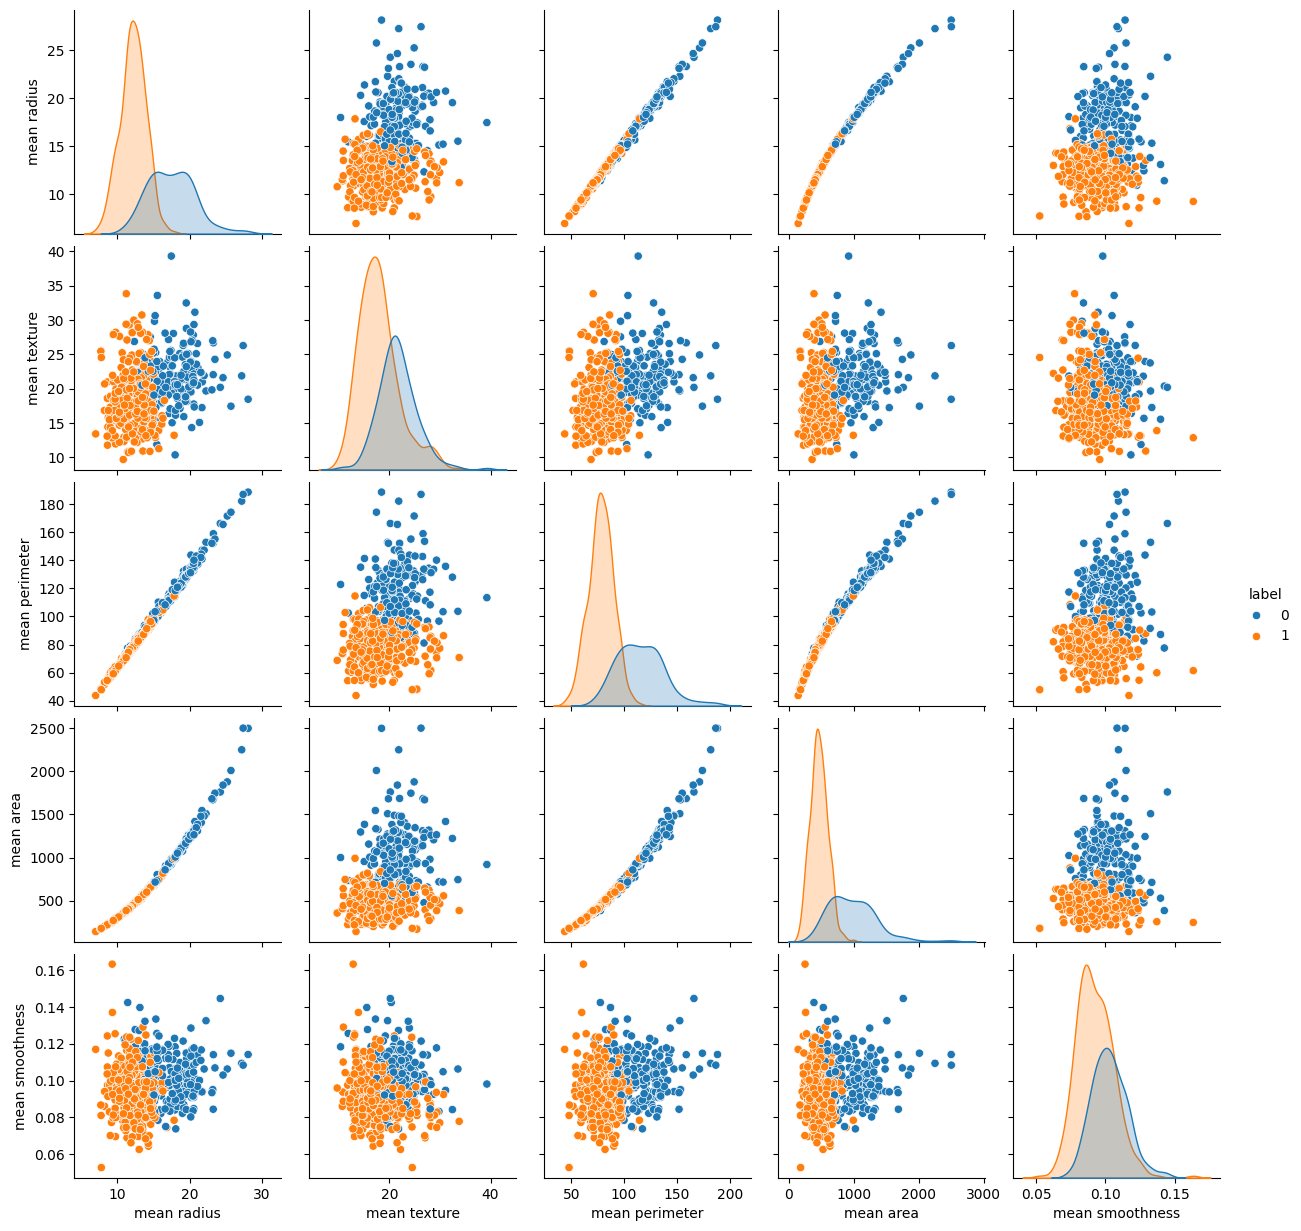

In [11]:
import seaborn as sns

df = df_data
df['label'] = df_labels
sns.pairplot(df, hue='label', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])

En la **diagonal principal del pairplot** se muestran las distribuciones univariadas de cada feature, separadas por clase. Estas curvas permiten observar cómo se distribuye cada variable individualmente en cada clase:
- Por ejemplo, en mean area o mean perimeter, se nota que la clase naranja (una de las clases) tiene valores generalmente más bajos que la clase azul, lo cual sugiere que estas variables podrían ser buenas para separar las clases.
- En cambio, en mean smoothness, ambas clases tienen distribuciones bastante solapadas, lo que indica que este feature tiene menor capacidad discriminativa por sí solo.

El resto de los gráficos muestran cómo se distribuyen los datos considerando únicamente **dos features a la vez**, ignorando los otros 28. Estos gráficos permiten observar si existe **separabilidad entre clases** en pares de variables.

En general, se observa que hay cierta **separación entre las clases** usando los features seleccionados, aunque no es perfecta. Esto sugiere que **aplicar un modelo como SVM podría ser apropiado**. En particular, podría ser útil utilizar un **kernel no lineal** para capturar mejor los límites entre clases en las zonas donde hay solapamiento.

## SVM no lineal con kernel sigmoideo

Ahora que analizamos los datos y sus features vamos a crear varios modelos SVM, entrenarlos con nuestros datos y observar su rendimiento.

Para ello, primero tenemos que dividir los datos en dataset de entrenamiento y dataset de testeo.

### <font color='red'>**Actividad 2:**</font>

**a)** Dividir los datos, reservando el **80 % para entrenamiento** y el **20 % para testeo**. Para ello, utilizar las variables df_data y df_labels creadas anteriormente. Almacenar los conjuntos resultantes en las siguientes variables:
- X_train, X_test: para los datos de entrada (features)
- y_train, y_test: para las etiquetas (labels)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2, random_state=42, stratify=df_labels)

In [13]:
print('El tamaño de X_train es:', X_train.shape)
print('El tamaño de y_train es:', y_train.shape)
print()
print('El tamaño de X_test es:', X_test.shape)
print('El tamaño de y_test es:', y_test.shape)

El tamaño de X_train es: (455, 31)
El tamaño de y_train es: (455,)

El tamaño de X_test es: (114, 31)
El tamaño de y_test es: (114,)


**b)** Importar el módulo correspondiente de Scikit-Learn para la creación de un modelo **SVM para clasificación**, y crear una instancia del mismo. En este caso, se utilizará un modelo **no lineal con kernel sigmoideo** (sigmoid).

In [14]:
from sklearn.svm import SVC

svc_model = SVC(kernel='sigmoid', random_state=42)

**c)** **Ajustar el modelo** con la función .fit() a los datos de entrenamiento

In [15]:
svc_model.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=42)

### Evaluación del modelo SVM no lineal con kernel sigmoideo
Ahora que tenemos el modelo SVM no lineal con kernel sigmoideo entrenado, vamos a realizar predicciones sobre el dataset de entrenamiento y observar el rendimiento del modelo, analizando la **matriz de confusión**.

In [16]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

y_train_predict = svc_model.predict(X_train)

cm_train = np.array(confusion_matrix(y_train, y_train_predict, labels=[0,1]))

confusion_matrix_train = pd.DataFrame(cm_train, index=['Maligno (Real)', 'Benigno (Real)'], columns=['Maligno (Estimado)', 'Benigno (Estimado)'])

In [17]:
confusion_matrix_train

,Maligno (Estimado),Benigno (Estimado)
Maligno (Real),24,146
Benigno (Real),99,186


La matriz de confusión muestra que el modelo comete muchos errores al clasificar casos malignos del **dataset de entrenamiento**:
- Sólo 27 de los 167 casos malignos reales fueron clasificados correctamente, mientras que 140 fueron mal clasificados como benignos.
- En los casos benignos, el modelo acierta en 180 de los 288 casos, pero clasifica erróneamente 108 como malignos.

Veamos como lo hace en el **dataset de testeo**.

In [18]:
y_test_predict = svc_model.predict(X_test)

cm_test = np.array(confusion_matrix(y_test, y_test_predict, labels=[0,1]))

confusion_matrix_test = pd.DataFrame(cm_test, index=['Maligno (Real)', 'Benigno (Real)'], columns=['Maligno (Estimado)', 'Benigno (Estimado)'])


In [19]:
confusion_matrix_test

,Maligno (Estimado),Benigno (Estimado)
Maligno (Real),5,37
Benigno (Real),26,46


Esta matriz indica que el modelo tiene un **recall bajo para la clase maligna**, ya que **de 45 casos malignos reales, solo 8 fueron correctamente clasificados**, mientras que **37 fueron mal clasificados como benignos** (falsos negativos).

En el caso de la clase benigna, el modelo tiene un mejor desempeño, con **48 verdaderos positivos** sobre 69 casos reales.

Este resultado es **preocupante en contextos sensibles como el médico**, donde los falsos negativos pueden tener consecuencias graves. El modelo tiende a **subestimar la clase maligna**.

A continuación, analizaremos algunas métricas, empezando por el **accuracy**.

In [20]:
from sklearn.metrics import accuracy_score

print("Accuracy:",accuracy_score(y_test, y_test_predict))


Accuracy: 0.4473684210526316


Además, con Scikit-Learn podemos crear facilmente un **reporte de clasificación** para observar las distintas metricas.

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predict))


              precision    recall  f1-score   support

           0       0.16      0.12      0.14        42
           1       0.55      0.64      0.59        72

    accuracy                           0.45       114
   macro avg       0.36      0.38      0.37       114
weighted avg       0.41      0.45      0.43       114



Como podemos ver, el modelo tiene un **accuracy muy bajo (≈ 39 %)** y un **desempeño deficiente en ambas clases**. En particular, clasifica mal los casos **malignos** (clase 0), con una **precisión de 0.19** y un **recall de 0.29**. Esto indica que el modelo **no es adecuado en su forma actual** y necesita mejoras. Por lo tanto, vamos a probar con un **kernel distinto**; en este caso, utilizaremos un **kernel polinomial**.

## SVM no lineal con kernel polinomial
Vamos a entrenar un modelo **SVM no lineal** utilizando un **kernel polinomial**, con el objetivo de mejorar la capacidad del modelo para capturar relaciones más complejas entre los datos que no son linealmente separables.

### <font color='red'>**Actividad 3:**</font>

**a)** Crear un **modelo SVM no lineal con kernel polinomial** y ajustarlo a los datos de entrenamiento.

In [23]:
from sklearn.svm import SVC

svc_poly_model = SVC(kernel='poly', random_state=42)

svc_poly_model.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

### Evaluación del modelo SVM no lineal con kernel polinomial
Una vez creado el modelo y ajustado a los datos de entrenamiento vamos a analizar las predicciones.

### <font color='red'>**Actividad 4:**</font>

**a)** Evaluar el modelo en el **dataset de entrenamiento**, creando la **matriz de confusión**

In [24]:
y_train_predict_poly = svc_poly_model.predict(X_train)

cm_train_poly = np.array(confusion_matrix(y_train, y_train_predict_poly, labels=[0,1]))

confusion_matrix_train_poly = pd.DataFrame(cm_train_poly, index=['Maligno (Real)', 'Benigno (Real)'], columns=['Maligno (Estimado)', 'Benigno (Estimado)'])

In [25]:
confusion_matrix_train_poly

,Maligno (Estimado),Benigno (Estimado)
Maligno (Real),135,35
Benigno (Real),6,279


**b)** Evaluar el modelo en el **dataset de testeo**, creando la **matriz de confusión**


In [26]:
y_test_predict_poly = svc_poly_model.predict(X_test)

cm_test_poly = np.array(confusion_matrix(y_test, y_test_predict_poly, labels=[0,1]))

confusion_matrix_test_poly = pd.DataFrame(cm_test_poly, index=['Maligno (Real)', 'Benigno (Real)'],  columns=['Maligno (Estimado)', 'Benigno (Estimado)'])

In [27]:
confusion_matrix_test_poly

,Maligno (Estimado),Benigno (Estimado)
Maligno (Real),35,7
Benigno (Real),2,70


**c)** Imprimir el **Accuracy** para las predicciones en el **dataset de testeo**

In [28]:
accuracy_poly = accuracy_score(y_test, y_test_predict_poly)
print(f"Accuracy: {accuracy_poly:.4f}")

Accuracy: 0.9211


**d)** Imprimir el **reporte de clasificación en testeo**

In [29]:
print(classification_report(y_test, y_test_predict_poly))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        42
           1       0.91      0.97      0.94        72

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



Si todo salió bien, en este punto nos daremos cuenta que utilizar el kernel polinomial fue una mejor decisión y que ahora tenemos un Accuracy mayor que 90%.

Veamos que sucede si utilizamos un kernel lineal, es decir, SVM lineal.

## SVM Lineal

### <font color='red'>**Actividad 5:**</font>

**a)** Crear **un modelo SVM lineal** y ajustarlo a los datos de entrenamiento

In [30]:
svc_linear_model = SVC(kernel='linear', random_state=42)

svc_linear_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

### Evaluación del modelo SVM Lineal
Una vez creado el modelo y ajustado a los datos de entrenamiento vamos a analizar las predicciones.

### <font color='red'>**Actividad 6:**</font>

**a)** Evaluar el modelo en el **dataset de entrenamiento**, creando la **matriz de confusión**

In [31]:
y_train_predict_linear = svc_linear_model.predict(X_train)

cm_train_linear = np.array(confusion_matrix(y_train, y_train_predict_linear, labels=[0,1]))

confusion_matrix_train_linear = pd.DataFrame(cm_train_linear, index=['Maligno (Real)', 'Benigno (Real)'], columns=['Maligno (Estimado)', 'Benigno (Estimado)'])

In [32]:
confusion_matrix_train_linear

,Maligno (Estimado),Benigno (Estimado)
Maligno (Real),170,0
Benigno (Real),0,285


**b)** Evaluar el modelo en el **dataset de testeo**, creando la **matriz de confusión**

In [35]:
y_test_predict_linear = svc_linear_model.predict(X_test)

cm_test_linear = np.array(confusion_matrix(y_test, y_test_predict_linear, labels=[0,1]))

confusion_matrix_test_linear = pd.DataFrame(cm_test_linear, index=['Maligno (Real)', 'Benigno (Real)'], columns=['Maligno (Estimado)', 'Benigno (Estimado)'])

In [36]:
confusion_matrix_test_linear

,Maligno (Estimado),Benigno (Estimado)
Maligno (Real),42,0
Benigno (Real),0,72


**c)** Imprimir el **Accuracy** para las predicciones en el **dataset de testeo**

In [37]:
accuracy_linear = accuracy_score(y_test, y_test_predict_linear)
print(f"Accuracy: {accuracy_linear:.4f}")

Accuracy: 1.0000


**d)** Imprimir el reporte de clasificación en testeo

In [38]:
print(classification_report(y_test, y_test_predict_linear))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        72

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



En este caso, deberiamos obtener un clasificador con un **Accuracy del 100% o muy cercano**. 

Naturalmente, esto no significa que hayamos creado un **modelo perfecto para la detección de cáncer**. En realidad, este dataset es un **conjunto de datos de ejemplo**, con una cantidad limitada de instancias, pensado principalmente para **fines educativos** y para aprender a utilizar distintos algoritmos de clasificación.

Para llevar un modelo de este tipo a **producción real**, sería necesario contar con un volumen de datos mucho mayor, representativo y de calidad, así como entrenar modelos más complejos y realizar una validación rigurosa.